C:\Users\HP\AppData\Local\Temp\ipykernel_6140\2846840761.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data = yf.download("GC=F", start="2025-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2025-01-02  2658.899902  2663.100098  2633.000000  2633.000000   1728
2025-01-03  2645.000000  2658.699951  2641.800049  2658.699951    591
2025-01-06  2638.399902  2647.000000  2617.300049  2645.500000    960
2025-01-07  2656.699951  2657.500000  2653.000000  2653.399902    643
2025-01-08  2664.500000  2676.899902  2653.500000  2655.500000    999
                  Close       Target
                   GC=F             
Date                                
2025-01-02  2658.899902  2645.000000
2025-01-03  2645.000000  2638.399902
2025-01-06  2638.399902  2656.699951
2025-01-07  2656.699951  2664.500000
2025-01-08  2664.500000  2683.800049
                  Close       Target
                   GC=F             
Date                                
2025-01-02  2658.899902  2645.000

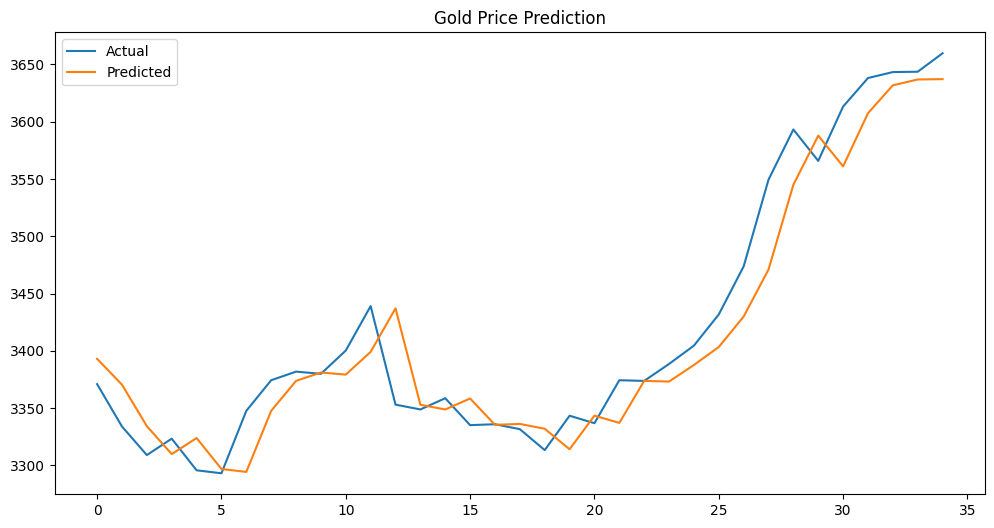

Predicted next day gold price: 3637.12 USD


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

# Download gold price data (last 10 years)
gold_data = yf.download("GC=F", start="2025-01-01", end="2025-12-31")

print(gold_data.head())
# This will give columns: Open, High, Low, Close, Adj Close, Volume.

# Data Preprocessing
# Keep only closing price
df = gold_data[('Close', 'GC=F')].copy().to_frame()
df = df.dropna()

# Create shifted column for supervised learning
df['Target'] = df[('Close', 'GC=F')].shift(-1)

# Remove last row (NaN target)
df = df.dropna()
print(df.head())

# Data Preprocessing
# Keep only closing price
df = gold_data[('Close', 'GC=F')].copy().to_frame()
df = df.dropna()

# Create shifted column for supervised learning
df['Target'] = df[('Close', 'GC=F')].shift(-1)

# Remove last row (NaN target)
df = df.dropna()
print(df.head())

# Train-Test Split
X = df[['Close']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Gold Price Prediction")
plt.show()

latest_price = df[('Close', 'GC=F')].iloc[-1]
future_price = model.predict([[latest_price]])
print(f"Predicted next day gold price: {future_price[0]:.2f} USD")